##Library and PyPI

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Preprocessing

In [2]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")

In [3]:
dataset.work_year.unique() 

array(['2022e', '2021', '2020', '2021e'], dtype=object)

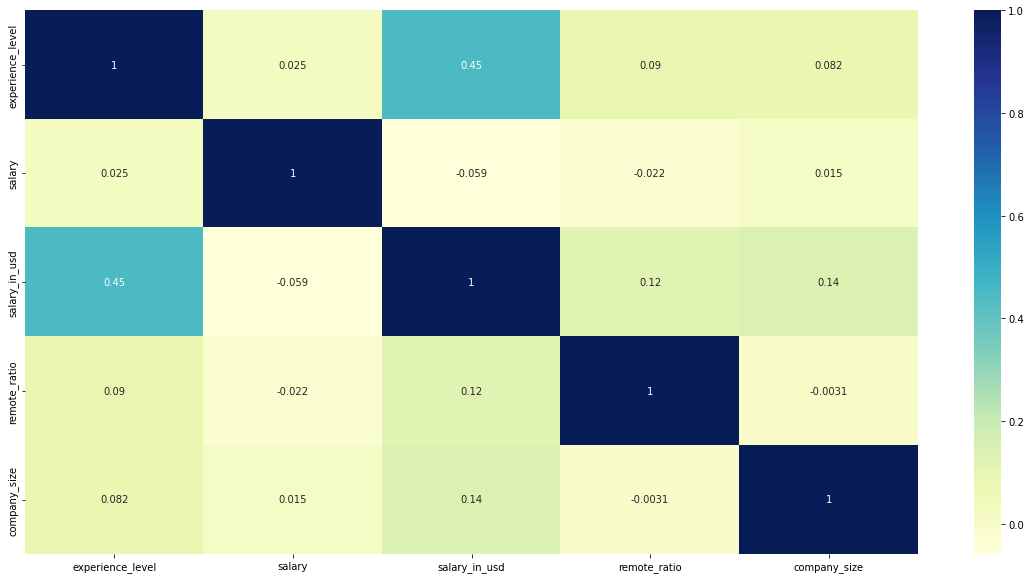

In [4]:
#check the correlation of the dataset
mapping = {'S': 1, 'M': 2,'L':3}
dataset=dataset.replace(to_replace="M",value=2)
dataset=dataset.replace(to_replace="L",value=3)
dataset=dataset.replace(to_replace="S",value=1)

dataset=dataset.replace(to_replace="EN",value=1)
dataset=dataset.replace(to_replace="MI",value=2)
dataset=dataset.replace(to_replace="SE",value=3)
dataset=dataset.replace(to_replace="EX",value=4)
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap = 'YlGnBu')
plt.savefig("correlation.png")

In [5]:
#split dataset by year
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2020 = dataset[dataset["work_year"] == '2020']
dataset_2021e = dataset[dataset["work_year"] == '2022e']

In [8]:
#  we need to know the difference between 2020, 2021e and 2021


# job-titles in 2020,2021 and 2021e
dataset_2020_job = dataset_2020.job_title.unique()
dataset_2021_job = dataset_2021.job_title.unique()
dataset_2021e_job = dataset_2021e.job_title.unique()

# Find jobs only in one of the two year job sets
# Find the set xor of two arrays. (0,0),(1,1)--> 0
unmatched_ids_20_21 = np.setxor1d(dataset_2021_job,dataset_2020_job) 
unmatched_ids_20_21e = np.setxor1d(dataset_2021e_job,dataset_2020_job) 
print(unmatched_ids_20_21)

['AI Scientist' 'Android Developer' 'Ansible Automation Engineer'
 'Applied Machine Learning Scientist' 'Associate Product Manager'
 'Automation Engineer' 'Azure Cloud Engineer' 'Azure DevOps Engineer'
 'Big Data Engineer' 'Business Analyst' 'Business Data Analyst'
 'Business Intelligence Analyst' 'Business Operations Manager'
 'Client Platform Engineer' 'Cloud Architect'
 'Cloud DevOps Systems Engineer' 'Cloud Infrastructure Engineer'
 'Cloud Operations Engineer' 'Computer Vision Engineer'
 'Concierge Security Engineer' 'Customer Service Representative'
 'Customer Success Manager' 'Customer Support Specialist'
 'Cyber Security Architect' 'Cyber Security Researcher'
 'Cyber Threat Analyst' 'Cyber Threat Intelligence Analyst'
 'Cybersecurity Analyst' 'Cybersecurity Researcher' 'Data Engineer'
 'Data Engineering Manager' 'Data Science Consultant'
 'Data Science Manager' 'Database Reliability Engineer' 'Design Director'
 'DevOps Architect' 'DevOps Automation Engineer' 'DevOps Consultant'


In [9]:
# print(f"salary in 2020 but not in 2021: \n{dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")
data_in_20_not_in_21 = dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()
dataset[dataset.job_title == 'Associate Product Manager']
data_in_21_not_in_20 = dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()
# print(f"salary in 2021 but not in 2020: \n{dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")

In [11]:
# we only consider the job title both in 2020 and 2021
pure_data_2020_def = dataset_2020.drop(dataset_2020[dataset_2020.job_title.isin(data_in_20_not_in_21)].index)
pure_data_2021_def = dataset_2021.drop(dataset_2021[dataset_2021.job_title.isin(data_in_21_not_in_20)].index)
#sort value
pure_data_2020_def = pure_data_2020_def.sort_values("salary_in_usd")
pure_data_2021_def = pure_data_2021_def.sort_values("salary_in_usd")

## Fairness: How big is the location influence for each level
Test whether the mean salary for each level differ across the location
Which conclusion can draw at the 1% significance level? USA and not USA

In [13]:
pure_data_2020_def.job_title.unique()

array(['DevOps Engineer', 'Cyber Security Analyst', 'Data Analyst',
       'Application Security Engineer', 'Data Scientist',
       'Cyber Security Specialist', 'Cloud DevOps Engineer',
       'Site Reliability Engineer', 'Information Security Engineer',
       'Penetration Tester', 'Chief Information Security Officer',
       'Security Engineer', 'Cyber Security Engineer', 'Copywriter',
       'Information Security Analyst', 'Information Security Manager',
       'Cloud Engineer', 'Information Security Specialist',
       'Cloud Security Engineer', 'Cybersecurity Engineer',
       'Backend Software Engineer', 'IT Security Analyst',
       'Security Analyst', 'Digital Forensics Analyst',
       'Software Security Engineer'], dtype=object)

In [14]:
# we first need to select which belong to the AI and ML salaries
not_ai_jobs_2020 = ['Copywriter','Site Reliability Engineer','Penetration Tester','Backend Software Engineer']
pure_data_2020 = pure_data_2020_def.drop(pure_data_2020_def[pure_data_2020_def.job_title.isin(not_ai_jobs_2020)].index)
pure_data_2020_USA =  pure_data_2020[pure_data_2020.company_location=='US']
pure_data_2020_not_USA = pure_data_2020[pure_data_2020.company_location!='US']

In [15]:
pure_data_2020_not_USA.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
702,2020,1,PT,DevOps Engineer,240000,INR,3238,IN,100,IN,1
43,2020,1,FT,Cyber Security Analyst,425000,INR,5734,IN,100,IN,3
1382,2020,2,FT,Data Analyst,8000,USD,8000,PK,50,PK,3
736,2020,2,FT,DevOps Engineer,34000,ILS,9883,IL,50,IL,2
264,2020,1,FT,Data Analyst,10000,USD,10000,NG,100,NG,1


In [17]:
# we first study the full time junior level jobs


pure_data_2020_USA_1 = pure_data_2020_USA[pure_data_2020_USA.experience_level == 1]
pure_data_2020_USA_1_FT = pure_data_2020_USA_1[pure_data_2020_USA_1.employment_type == 'FT']

pure_data_2020_not_USA_1 = pure_data_2020_not_USA[pure_data_2020_not_USA.experience_level == 1]
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1[pure_data_2020_not_USA_1.employment_type == 'FT']

print(pure_data_2020_USA_1_FT.salary_in_usd.mean())
print(pure_data_2020_not_USA_1_FT.salary_in_usd.mean())

79310.0
40014.17647058824


In [18]:
# t-test
import scipy
p = scipy.stats.ttest_ind(pure_data_2020_USA_1_FT.salary_in_usd, pure_data_2020_not_USA_1_FT.salary_in_usd, axis=0, equal_var=False).pvalue
print('p-value',p)
# p-value is less than or equal to the specified significance level α, the null hypothesis is rejected
# we reject the null hypothesis----> the average salary is different in USA and not USA

p-value 6.614819093310973e-07


## Which job earn more money?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


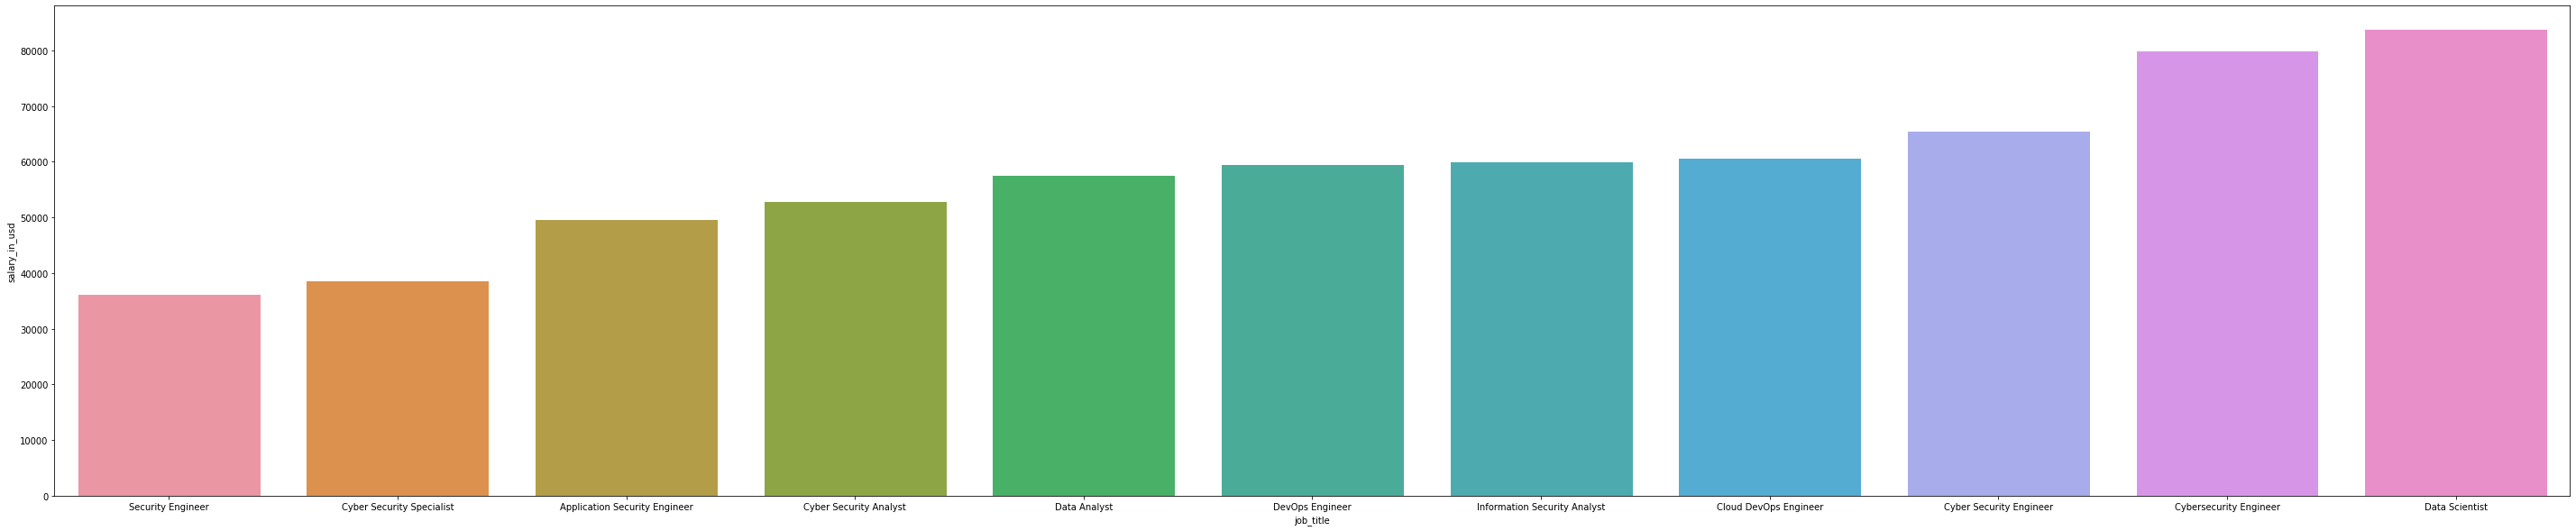

In [19]:
fig, ax = plt.subplots(figsize=(50,10))

pure_data_2020_FT = pure_data_2020[pure_data_2020.employment_type =='FT' ]
pure_data_2020_FT = (
    pure_data_2020_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2020_FT_en = pure_data_2020_FT[pure_data_2020_FT.experience_level == 1]
pure_data_2020_FT_en = pure_data_2020_FT_en.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_en)
plt.savefig('junior_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


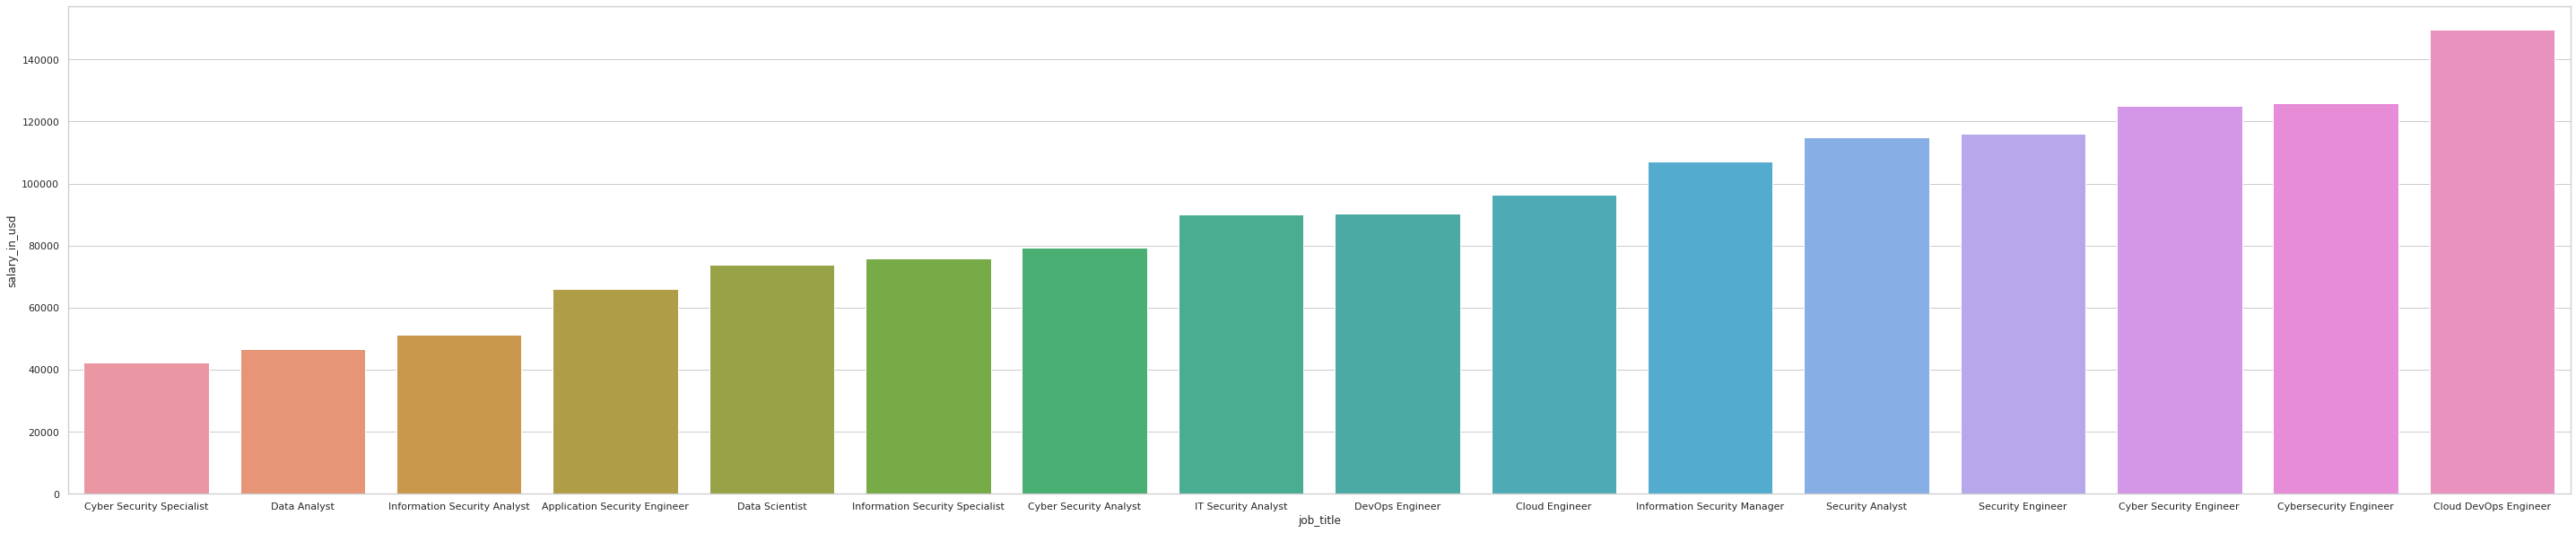

In [20]:
fig, ax = plt.subplots(figsize=(50,10))
pure_data_2020_FT_mi = pure_data_2020_FT[pure_data_2020_FT.experience_level == 2]
pure_data_2020_FT_mi = pure_data_2020_FT_mi.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_mi)
plt.savefig('intermediate_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


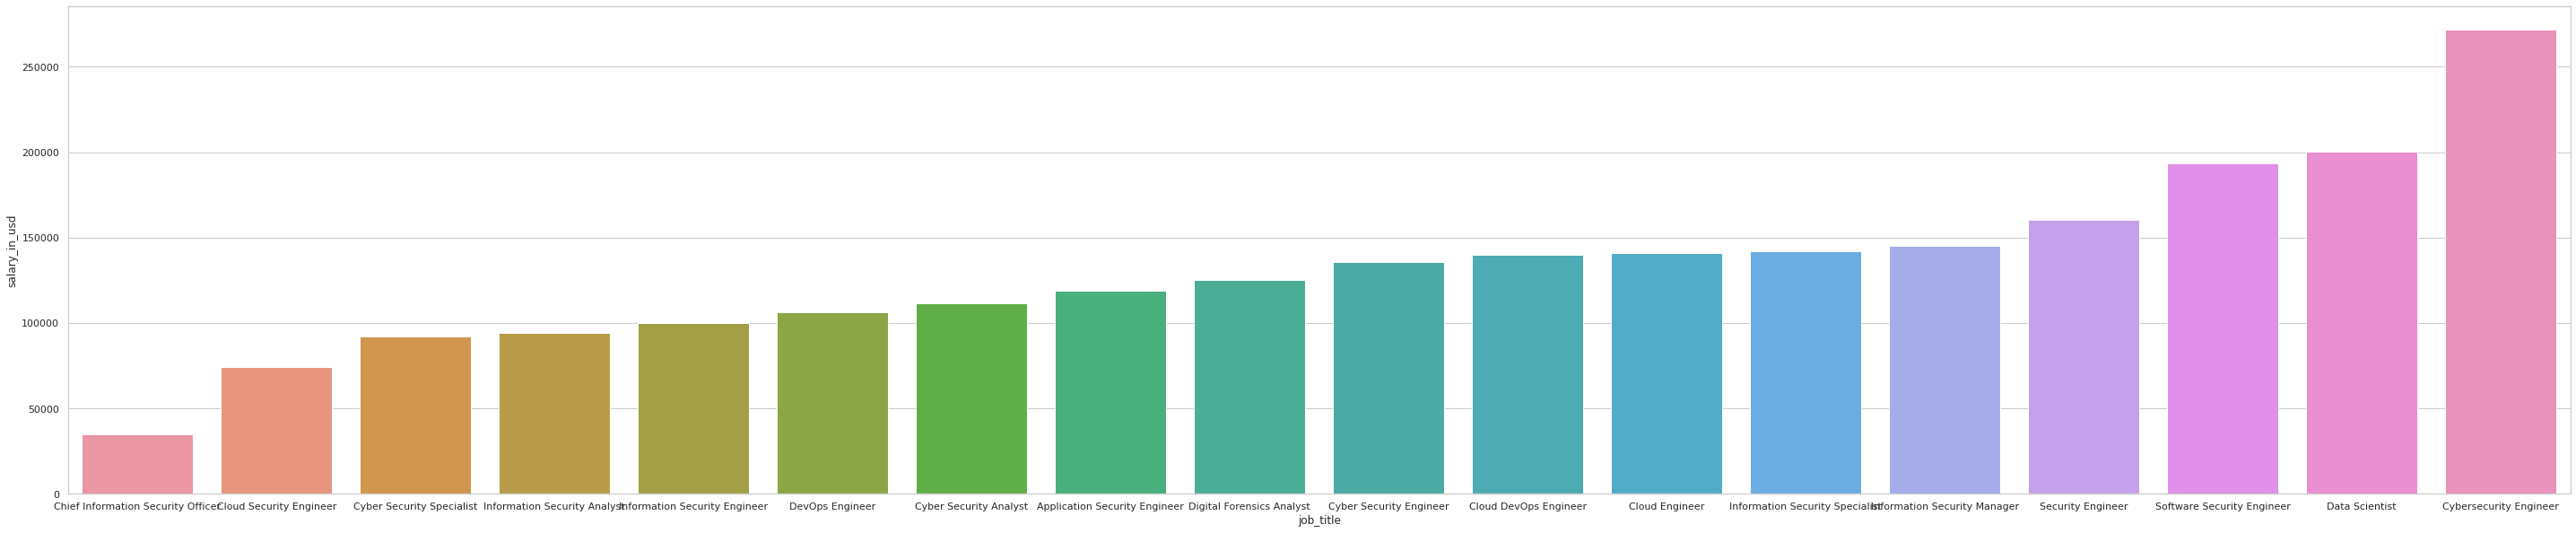

In [21]:
fig, ax = plt.subplots(figsize=(50,10))
pure_data_2020_FT_ex = pure_data_2020_FT[pure_data_2020_FT.experience_level == 3]
pure_data_2020_FT_ex = pure_data_2020_FT_ex.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_ex)
plt.savefig('senior_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


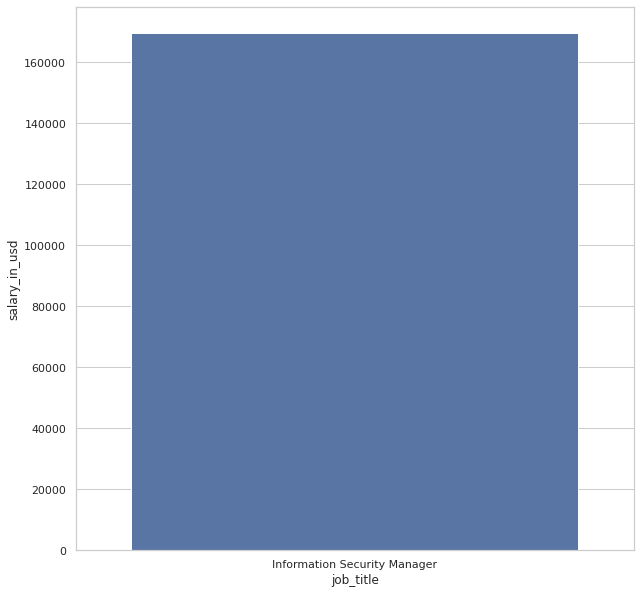

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
pure_data_2020_FT_di = pure_data_2020_FT[pure_data_2020_FT.experience_level == 4]
pure_data_2020_FT_di = pure_data_2020_FT_di.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_di)
plt.savefig('executive_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


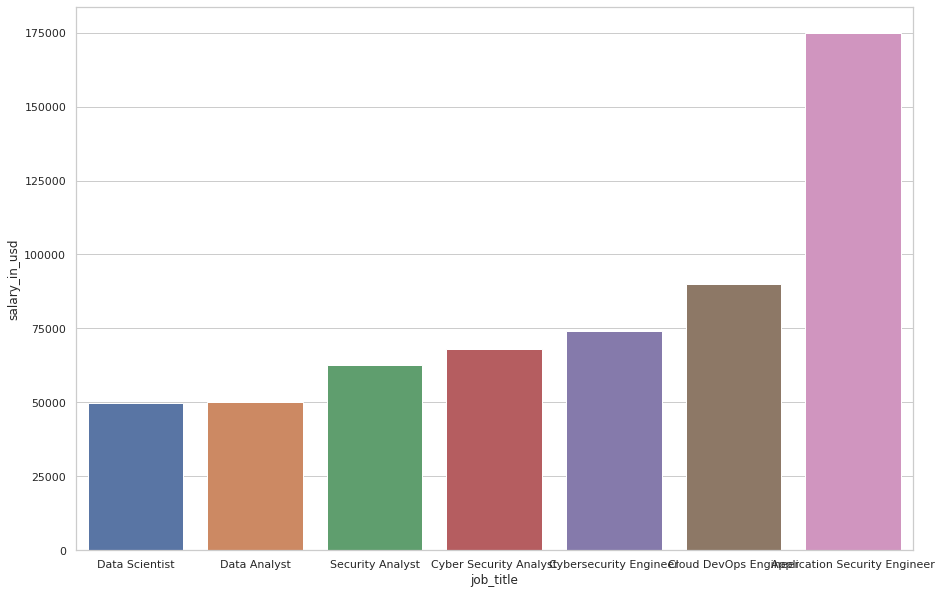

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

pure_data_2021_FT = pure_data_2021_def[pure_data_2021_def.employment_type =='FT' ]
pure_data_2021_FT = (
    pure_data_2021_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2021_FT_en = pure_data_2021_FT[pure_data_2021_FT.experience_level == 1]
pure_data_2021_FT_en = pure_data_2021_FT_en.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_en)
plt.savefig('junior_salary_plot_2021.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


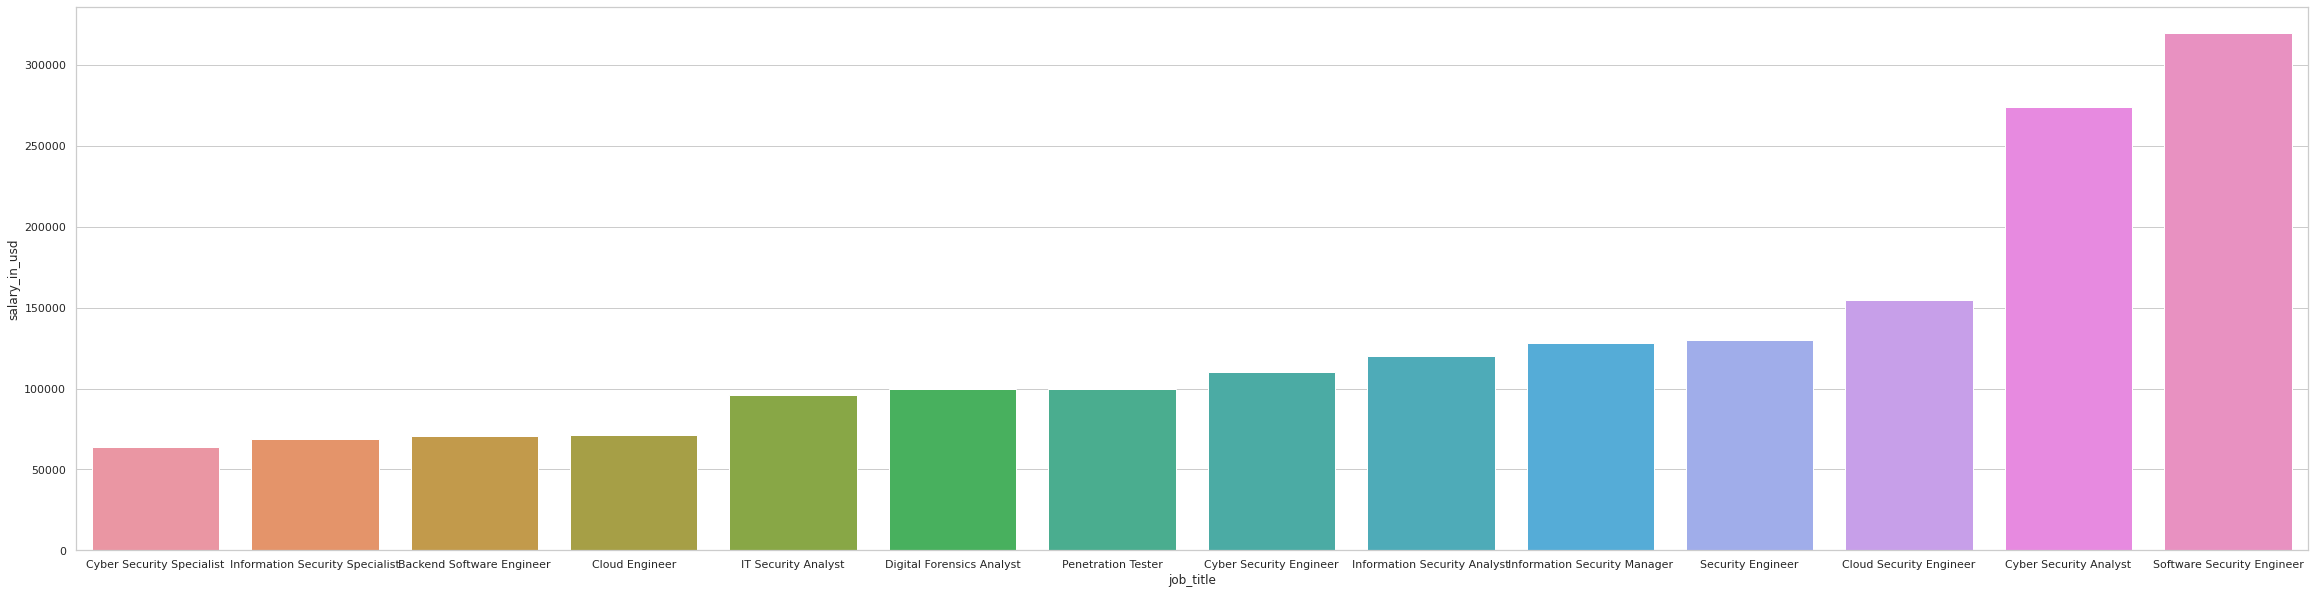

In [24]:
fig, ax = plt.subplots(figsize=(40,10))
pure_data_2021_FT_mi = pure_data_2021_FT[pure_data_2021_FT.experience_level == 2]
pure_data_2021_FT_mi = pure_data_2021_FT_mi.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_mi)
plt.savefig('intermediate_salary_plot_2021.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


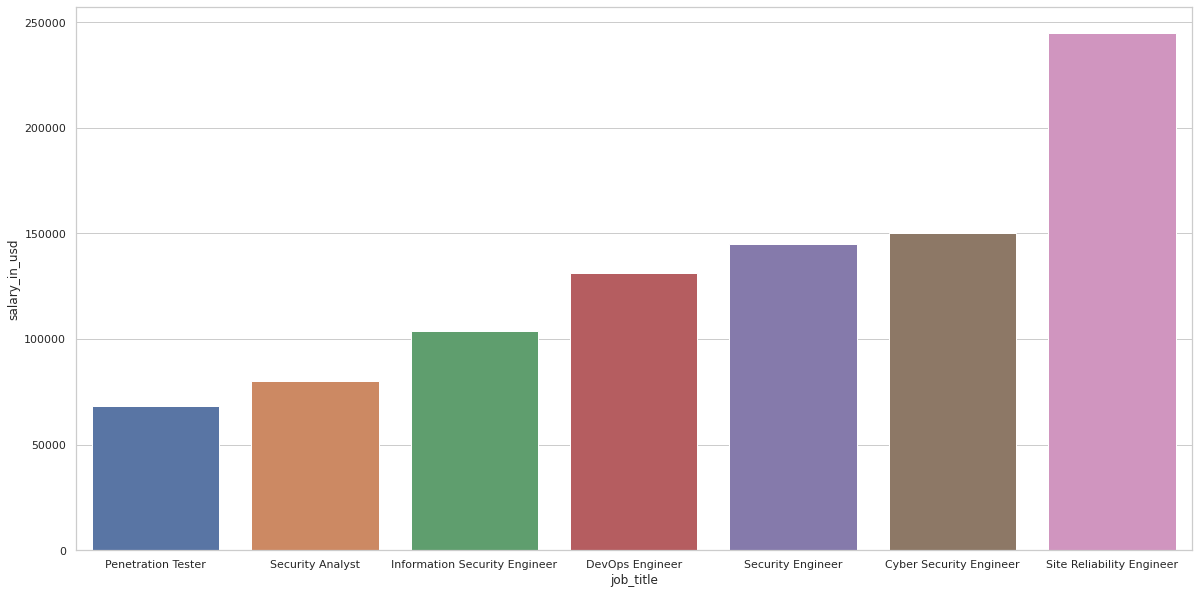

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
pure_data_2021_FT_ex = pure_data_2021_FT[pure_data_2021_FT.experience_level == 3]
pure_data_2021_FT_ex = pure_data_2021_FT_ex.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_ex)
plt.savefig('senior_salary_plot_2021.png')

## Which job has a brighter future:

In [26]:
# 2020
print(pure_data_2020_FT_en.job_title.to_list())
print(pure_data_2020_FT_mi.job_title.to_list())
print(pure_data_2020_FT_ex.job_title.to_list())

['Security Engineer', 'Cyber Security Specialist', 'Application Security Engineer', 'Cyber Security Analyst', 'Data Analyst', 'DevOps Engineer', 'Information Security Analyst', 'Cloud DevOps Engineer', 'Cyber Security Engineer', 'Cybersecurity Engineer', 'Data Scientist']
['Cyber Security Specialist', 'Data Analyst', 'Information Security Analyst', 'Application Security Engineer', 'Data Scientist', 'Information Security Specialist', 'Cyber Security Analyst', 'IT Security Analyst', 'DevOps Engineer', 'Cloud Engineer', 'Information Security Manager', 'Security Analyst', 'Security Engineer', 'Cyber Security Engineer', 'Cybersecurity Engineer', 'Cloud DevOps Engineer']
['Chief Information Security Officer', 'Cloud Security Engineer', 'Cyber Security Specialist', 'Information Security Analyst', 'Information Security Engineer', 'DevOps Engineer', 'Cyber Security Analyst', 'Application Security Engineer', 'Digital Forensics Analyst', 'Cyber Security Engineer', 'Cloud DevOps Engineer', 'Cloud 

In [29]:
# 2021
print(pure_data_2021_FT_en.job_title.to_list())
print(pure_data_2021_FT_mi.job_title.to_list())
print(pure_data_2021_FT_ex.job_title.to_list())

['Data Scientist', 'Data Analyst', 'Security Analyst', 'Cyber Security Analyst', 'Cybersecurity Engineer', 'Cloud DevOps Engineer', 'Application Security Engineer']
['Cyber Security Specialist', 'Information Security Specialist', 'Backend Software Engineer', 'Cloud Engineer', 'IT Security Analyst', 'Digital Forensics Analyst', 'Penetration Tester', 'Cyber Security Engineer', 'Information Security Analyst', 'Information Security Manager', 'Security Engineer', 'Cloud Security Engineer', 'Cyber Security Analyst', 'Software Security Engineer']
['Penetration Tester', 'Security Analyst', 'Information Security Engineer', 'DevOps Engineer', 'Security Engineer', 'Cyber Security Engineer', 'Site Reliability Engineer']
